In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from ultralytics import YOLO

In [3]:
import cv2

In [4]:
model=YOLO("../YoloWeights/yolov8l.pt")

100%|██████████| 83.7M/83.7M [00:00<00:00, 221MB/s]


In [5]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
        "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
        "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
        "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
        "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
        "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
        "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "potted plant", "bed",
        "dining table", "toilet", "tv monitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
        "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
        "teddy bear", "hair drier", "toothbrush"]

FileUpload(value={}, accept='image/*', description='Upload')

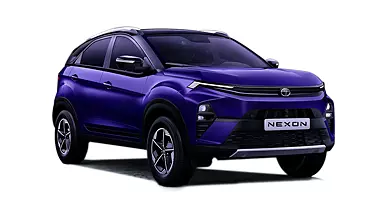

In [6]:
#Taking image input from the user.
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io
import os

fileLocation=[]


upload_widget = widgets.FileUpload(
    accept='image/*',
    multiple=False
)


display(upload_widget)

def on_upload_change(change):
    for name, file_info in change['new'].items():
        img = Image.open(io.BytesIO(file_info['content']))
        display(img)
        save_path = os.path.join("../uploaded_images",name)
        fileLocation.append(save_path)
        if not os.path.exists("../uploaded_images"):
            os.makedirs("../uploaded_images")
        img.save(save_path)

upload_widget.observe(on_upload_change, names='value')


In [7]:
fileLocation[0]

'../uploaded_images/cars.webp'

In [8]:
results=model(f"{fileLocation[0]}")


image 1/1 /content/../uploaded_images/cars.webp: 384x640 1 car, 2002.8ms
Speed: 20.8ms preprocess, 2002.8ms inference, 2740.3ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
#Extracting classes and other related objects from the dataset.
detected_class_ids = results[0].boxes.cls.cpu().numpy().astype(int)

In [10]:
#Mapping the detected classes with stored classes
detected_objects = [classNames[class_id] for class_id in detected_class_ids]

In [11]:
detected_objects

['car']

In [12]:
import pandas as pd

In [14]:
#Importing excel file and coverting it to database.
database=pd.read_excel("carbon_footprint_database.xlsx")

In [15]:
database

,Object,Carbon Footprint (kg CO2e)
0,person,0.00
1,bicycle,100.00
2,car,6000.00
3,motorbike,1000.00
4,aeroplane,2850.00
...,...,...
75,vase,0.30
76,scissors,0.10
77,teddy bear,2.00
78,hair drier,5.00


In [19]:
#Fetching carbon footprint from detected object.
for i in range(0,len(database["Object"]),1):
  if(database["Object"][i]==detected_objects[0]):
    print(database["Carbon Footprint (kg CO2e)"][i])
    break

6000.0
